# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [1]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


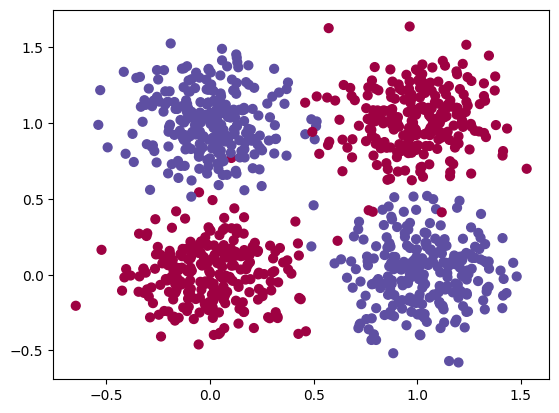

In [2]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense


my_model = keras.Sequential()
# Your code here!
my_model.add(Dense(8, input_dim=2, activation="relu"))
my_model.add(Dense(1, activation="sigmoid"))

my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

loss, accuracy = my_model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')
#cracked

2023-11-05 12:50:15.790503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 12:50:15.849275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 12:50:15.849307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 12:50:15.849330: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 12:50:15.874382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 12:50:15.877332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

7/7 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9650
Test loss: 0.1357, Test accuracy: 0.9650


- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [141]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.randn(n1,n0) 
        self.b1 = np.random.randn(n1, 1)
        self.W2 = np.random.randn(n2, n1)
        self.b2 = np.random.randn(n2, 1)

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.softmax(Z2)
        
        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        
        #ensure no log(0) leading to -inf
        epsilon = 1e-20
        
        cross_entropy = -np.log(A2 + epsilon) * Y

        cross_entropy_sum = np.sum(cross_entropy, axis=0)

        L = np.mean(cross_entropy_sum)

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m = y.shape[0]
        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y, epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)
            
            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent
            self.W1 -= self.alpha*dW1
            self.b1 -= self.alpha*db1
            self.W2 -= self.alpha*dW2
            self.b2 -= self.alpha*db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.

        A1, A2 = self.forward_pass(X)

        y_hat = np.argmax(A2, axis=0) 
 
        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m

    def softmax(self, A2):

        # shift the values by the max to prevent overflow in exponentiation
        exp_shifted = np.exp(A2 - np.max(A2, axis=0, keepdims=True))

        # calculate actual softmax probability
        probabilities = exp_shifted / np.sum(exp_shifted, axis=0, keepdims=True)

        return probabilities

    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/1000 - loss: 2.886759 - accuracy: 0.376389 - val_loss: 2.511317 - val_accuracy: 0.450000
Epoch 10/1000 - loss: 2.057140 - accuracy: 0.440278 - val_loss: 1.906089 - val_accuracy: 0.437500
Epoch 20/1000 - loss: 1.573770 - accuracy: 0.488889 - val_loss: 1.523064 - val_accuracy: 0.437500
Epoch 30/1000 - loss: 1.177189 - accuracy: 0.500000 - val_loss: 1.182367 - val_accuracy: 0.487500
Epoch 40/1000 - loss: 0.856786 - accuracy: 0.502778 - val_loss: 0.889355 - val_accuracy: 0.475000
Epoch 50/1000 - loss: 0.630780 - accuracy: 0.502778 - val_loss: 0.666717 - val_accuracy: 0.475000
Epoch 60/1000 - loss: 0.493218 - accuracy: 0.648611 - val_loss: 0.519376 - val_accuracy: 0.637500
Epoch 70/1000 - loss: 0.414926 - accuracy: 0.906944 - val_loss: 0.429523 - val_accuracy: 0.862500
Epoch 80/1000 - loss: 0.369137 - accuracy: 0.931944 - val_loss: 0.374731 - val_accuracy: 0.925000
Epoch 90/1000 - loss: 0.340087 - accuracy: 0.938889 - val_loss: 0.339506 - val_accuracy: 0.937500
Epoch 100/1000 - loss

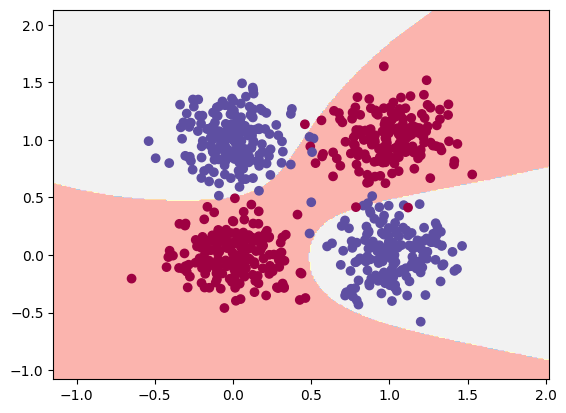

In [142]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 64 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = .01 # learning rate for gradient descent
epochs = 1000 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

Epoch 0/15 - loss: 7.587871 - accuracy: 0.484722 - val_loss: 5.846419 - val_accuracy: 0.575000
Epoch 10/15 - loss: 1.759936 - accuracy: 0.551389 - val_loss: 1.642458 - val_accuracy: 0.612500
Accuracy on the test set is  0.945


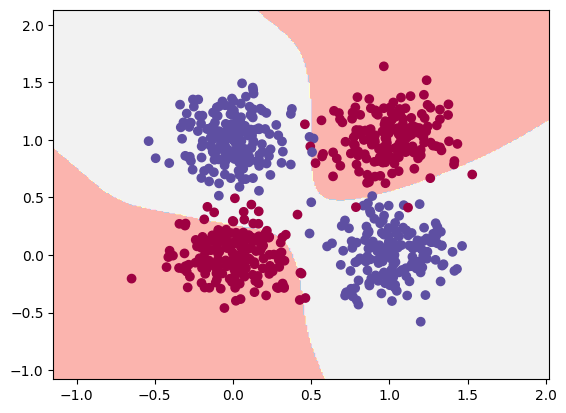

In [131]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 256 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = .1 # learning rate for gradient descent
epochs = 15 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

Epoch 0/2000 - loss: 16.658549 - accuracy: 0.486111 - val_loss: 13.307592 - val_accuracy: 0.587500
Epoch 10/2000 - loss: 6.655573 - accuracy: 0.481944 - val_loss: 5.111201 - val_accuracy: 0.575000
Epoch 20/2000 - loss: 2.880337 - accuracy: 0.608333 - val_loss: 2.557705 - val_accuracy: 0.600000
Epoch 30/2000 - loss: 1.258735 - accuracy: 0.594444 - val_loss: 1.354745 - val_accuracy: 0.587500
Epoch 40/2000 - loss: 0.495104 - accuracy: 0.759722 - val_loss: 0.654901 - val_accuracy: 0.712500
Epoch 50/2000 - loss: 0.325678 - accuracy: 0.877778 - val_loss: 0.436168 - val_accuracy: 0.787500
Epoch 60/2000 - loss: 0.266076 - accuracy: 0.923611 - val_loss: 0.350869 - val_accuracy: 0.825000
Epoch 70/2000 - loss: 0.231594 - accuracy: 0.945833 - val_loss: 0.301074 - val_accuracy: 0.850000
Epoch 80/2000 - loss: 0.207117 - accuracy: 0.954167 - val_loss: 0.266326 - val_accuracy: 0.862500
Epoch 90/2000 - loss: 0.188368 - accuracy: 0.955556 - val_loss: 0.240145 - val_accuracy: 0.875000
Epoch 100/2000 - lo

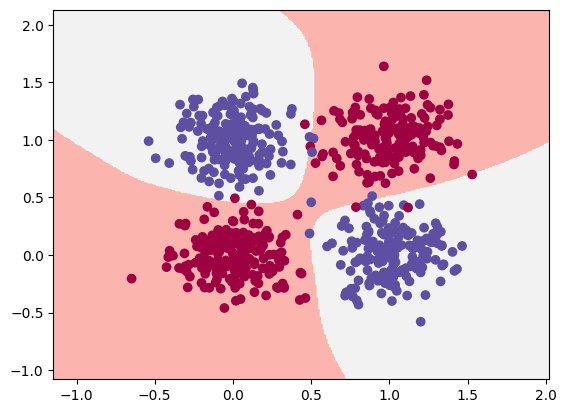

In [138]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 256 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = .01 # learning rate for gradient descent
epochs = 2000 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

In [134]:
# COMPARISONS WITH THE STANDARD LIBRARY


"""
We achieved identical performance to the standard library in our third model, but performed significantly more raw computations to get there. More epochs and worse activation functions and gradient descent methods were the root cause
of this I believe. Though our performance was just slightly better in this third method than the simple NN below:
"""

my_comparison_model = keras.Sequential()
# Your code here!
my_comparison_model.add(Dense(64, input_dim=2, activation="relu"))
my_comparison_model.add(Dense(1, activation="sigmoid"))

my_comparison_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_comparison_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

loss, accuracy = my_model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')
#cracked


7/7 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9700
Test loss: 0.1130, Test accuracy: 0.9700


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

In [ ]:
"""
Compared to the standard library, with very specific hyperparameter tuning I was able to get equivalent performance on the test set with 97.5% accuracy. This was incredibly finnicky though as changing even a single parameter could
single-handedly result in performance < 50%. Overall, the standard library is definitely superior to our 2 layer limited Neural-Network, but the performance being similar at all is impressive nonetheless. Being able to use more
sophisticated learning algorithms and better activation functions also allowed the tensorflow keras model to excel somewhat regardless of the hyperparameters/node count per layer. The keras approach was definitely more 
resilient to randomization than my own. The keras model was also able to reach the same performance in a fraction of the epochs and computations.

Writing the code for this model was incredibly rewarding though undeniably difficult to debug. Because of the somewhat randomness in initialization, I spent a long time worried I was not capturing the non-linear relationships in
the data before finally realizing it was just poor hyperparameter and weight initilization. Upon discovering this, I was able to manually tune the hyperparameters to get the 97.5% success rate we see in model 3, though if you change 
any one parameter you will see a decline in performance. I would say my model is effective but very fragile where the keras standard library implementation seems to be resilient and consistent. My current thought process is that 
this resiliency is derived from the superior optimization algorithm with Adam as well as the superior activation function in ReLU as well as what is likely just better initialization of the weight matrices with 
more logic dictating how the computation is done.

I definitely learned the most at the final stage debugging my non-linear relationship in the data, it revealed how complicated yet moldable a neural network can be. A higher learning rate might lend to a lower epoch count but I 
low learning rate might need more epochs to find the desired performance. It really makes you appreciate how the engineers at OpenAI had to optimize their GPT models, that must have been brutal and time consuming.
"""

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!